<a href="https://colab.research.google.com/github/Nsmanik/AI_phase-1/blob/main/Location_based_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset .csv to Dataset .csv


In [ ]:
#Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [ ]:
# Load the Dataset
df = pd.read_csv("Dataset.csv")

print("Dataset Shape:", df.shape)
print("Column Names:", df.columns)
print("Missing Values:\n", df.isnull().sum())

Dataset Shape: (9551, 21)
Column Names: Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
Missing Values:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes             

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
#Clean Data
df_location = df.dropna(subset=['Latitude', 'Longitude'])

In [ ]:
#Plot Restaurants on Map
map_view = folium.Map(location=[df_location['Latitude'].mean(), df_location['Longitude'].mean()], zoom_start=10)
cluster = MarkerCluster().add_to(map_view)

for _, row in df_location.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name']
    ).add_to(cluster)

map_view.save("restaurant_map.html")

from IPython.display import IFrame
IFrame("restaurant_map.html", width=700, height=500)

<ipython-input-19-291fb2675457>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette="coolwarm")


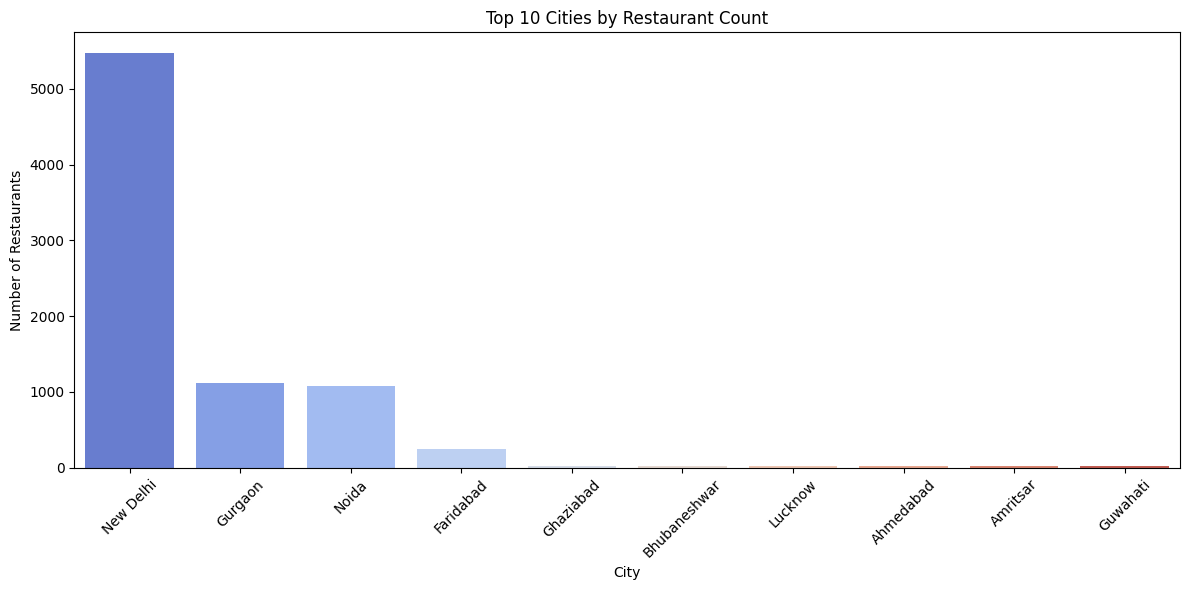

In [ ]:
#Restaurants by City
city_counts = df['City'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette="coolwarm")
plt.title("Top 10 Cities by Restaurant Count")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-20-99d2d30f9317>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_rating.index, y=city_rating.values, palette="viridis")


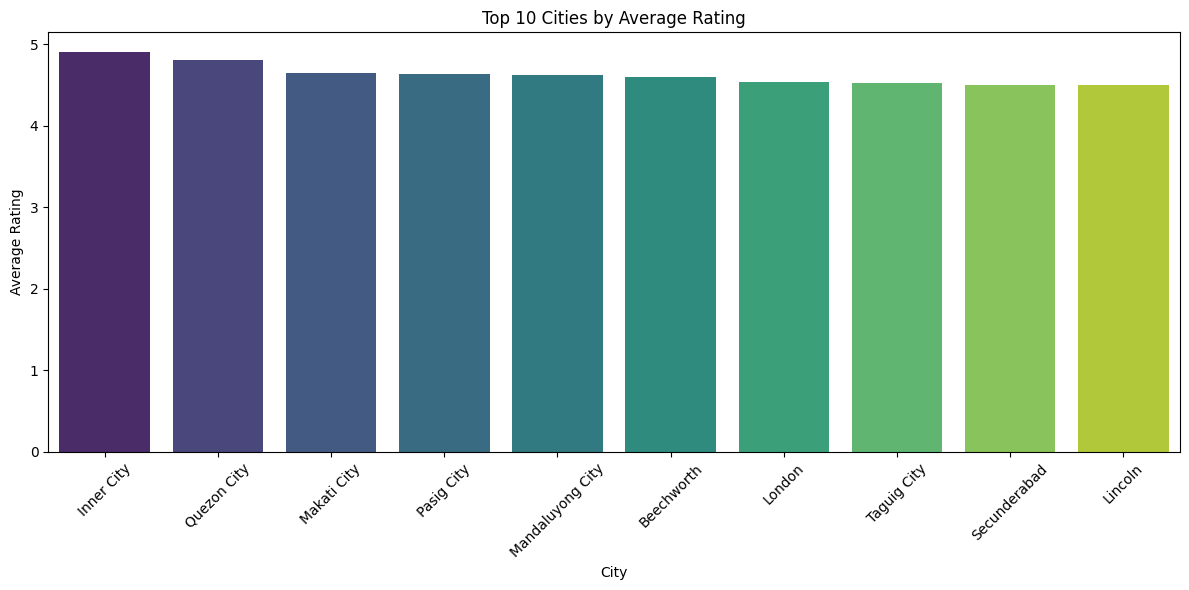

In [ ]:
#Average rating by city
city_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=city_rating.index, y=city_rating.values, palette="viridis")
plt.title("Top 10 Cities by Average Rating")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-21-8c3c26504634>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_price.index, y=city_price.values, palette="plasma")


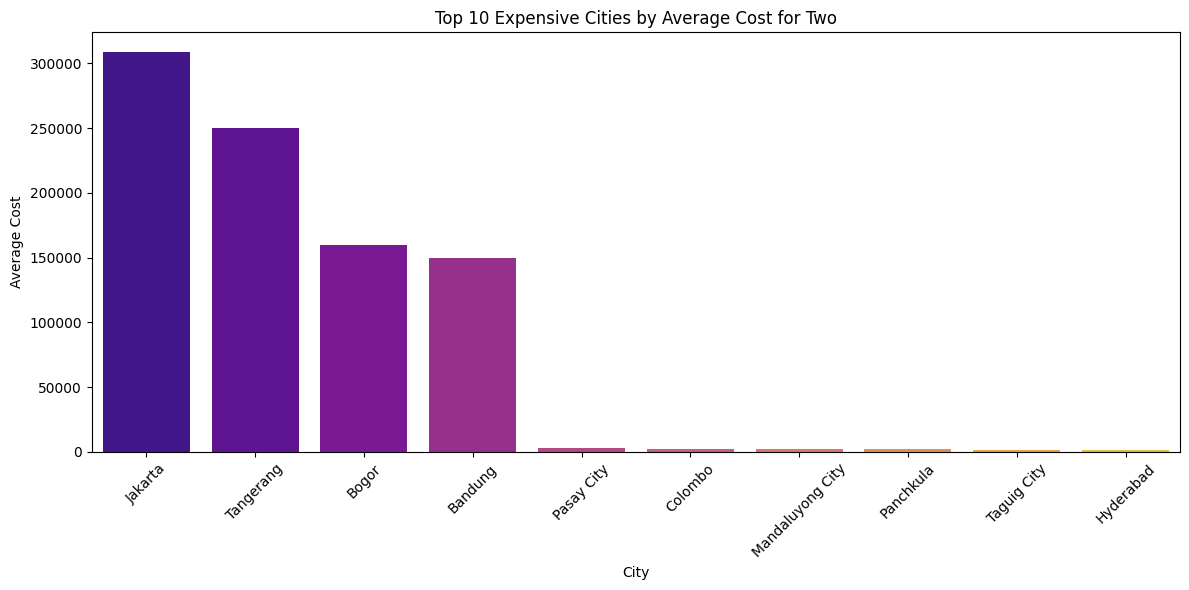

In [ ]:
#Price Range by City
city_price = df.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=city_price.index, y=city_price.values, palette="plasma")
plt.title("Top 10 Expensive Cities by Average Cost for Two")
plt.xlabel("City")
plt.ylabel("Average Cost")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Top Cuisines by City
top_cities = df['City'].value_counts().head(5).index
for city in top_cities:
    city_df = df[df['City'] == city]
    top_cuisines = city_df['Cuisines'].value_counts().head(5)

    print(f"\n🍽️ Top cuisines in {city}:\n", top_cuisines)


🍽️ Top cuisines in New Delhi:
 Cuisines
North Indian             658
North Indian, Chinese    284
Fast Food                242
Chinese                  228
North Indian, Mughlai    207
Name: count, dtype: int64

🍽️ Top cuisines in Gurgaon:
 Cuisines
North Indian             105
North Indian, Chinese     66
Cafe                      45
North Indian, Mughlai     42
Bakery                    35
Name: count, dtype: int64

🍽️ Top cuisines in Noida:
 Cuisines
North Indian             110
North Indian, Chinese     97
Chinese                   54
North Indian, Mughlai     54
Fast Food                 53
Name: count, dtype: int64

🍽️ Top cuisines in Faridabad:
 Cuisines
North Indian                      28
North Indian, Chinese             27
North Indian, Mughlai, Chinese    13
Bakery                            12
North Indian, Mughlai             10
Name: count, dtype: int64

🍽️ Top cuisines in Ghaziabad:
 Cuisines
North Indian             3
Cafe                     3
Chinese                